<a href="https://colab.research.google.com/github/kr19al0711/ds-cs982-student-success/blob/develop/StudentSuccessPredictionDraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes
- **Problem Statment**: Predict student success in an undergraduate degreee considering demographic and socio-economics factors. Features also includes academic history prior to registration

- **Classification**: Graduated and Dropout, each column represents a student

- **Data Cleanup Notes**:
  - There were no null values in the dataset
  - Features that describe the academic and performance details of the student are dropped
  - We will drop rows for students who have a label enrolled
  - Marital Status - Pending
  - Course - Pending
  - Previous Qualification and Grade - Completed
  - Nationality - Pending
  -

#Importing Python Libraries and Dataset


In [297]:
import pandas as pd
pd.options.mode.chained_assignment = None

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import math

#https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [298]:
data = pd.read_csv("https://archive.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip",sep=";")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [300]:
data.groupby("Target")["Target"].count()

,Target
Target,
Dropout,1421
Enrolled,794
Graduate,2209


In [301]:
#Descriptive statistics of the dataset
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# Exploring Data

## Data Cleaning

In [302]:
#Removing \t from "Daytime/evening attendance\t" column
data.rename(columns = {"Daytime/evening attendance\t":"Daytime/evening attendance"},inplace=True)

In [303]:
# Demographic Data
demographic_data = [
    'Marital status',
    'Nacionality',
    'Gender',
    'Age at enrollment',
    'International',
    'Educational special needs'
]

# Socio-Economic Data
socio_economic_data = [
    'Mother’s qualification',
    'Father’s qualification',
    'Mother’s occupation',
    'Father’s occupation',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Scholarship holder',
    'Displaced',
    'Debtor'
]

# Academic Data
academic_data = [
    'Application order',
    'Course',
    'Previous qualification',
    'Previous qualification (grade)',
    'Admission grade'
]

# Academic Data to be dropped. Justify!!!!
academic_data_dropped=[
    'Tuition fees up to date',
    'Application mode',
    'Daytime/evening attendance',
]

# Performance Data
performance_data = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

drop_features = academic_data_dropped + performance_data

target = ["Target"]


In [304]:
# Dropping rows for Enrolled students
student_success = data[data["Target"] != "Enrolled"]
student_success.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [305]:
# Dropping student curricullum features
student_success.drop(columns=drop_features,inplace=True)
student_success.head()

,Marital status,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,5,171,1,122.0,1,19,12,5,9,...,0,0,1,0,20,0,10.8,1.4,1.74,Dropout
1,1,1,9254,1,160.0,1,1,3,3,3,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,1,5,9070,1,122.0,1,37,37,9,9,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,1,2,9773,1,122.0,1,38,37,5,3,...,0,0,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,2,1,8014,1,100.0,1,37,38,9,9,...,0,0,0,0,45,0,13.9,-0.3,0.79,Graduate


In [306]:
# plt.figure(figsize=(20, 10))
# #chekcing for outliers
label_encoder = LabelEncoder()
student_success['Target'] = label_encoder.fit_transform(student_success['Target'])
# sns.heatmap(student_success.corr())
# # sns.barplot(student_success.corr())

<ipython-input-307-31cb165f31a9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette="viridis")


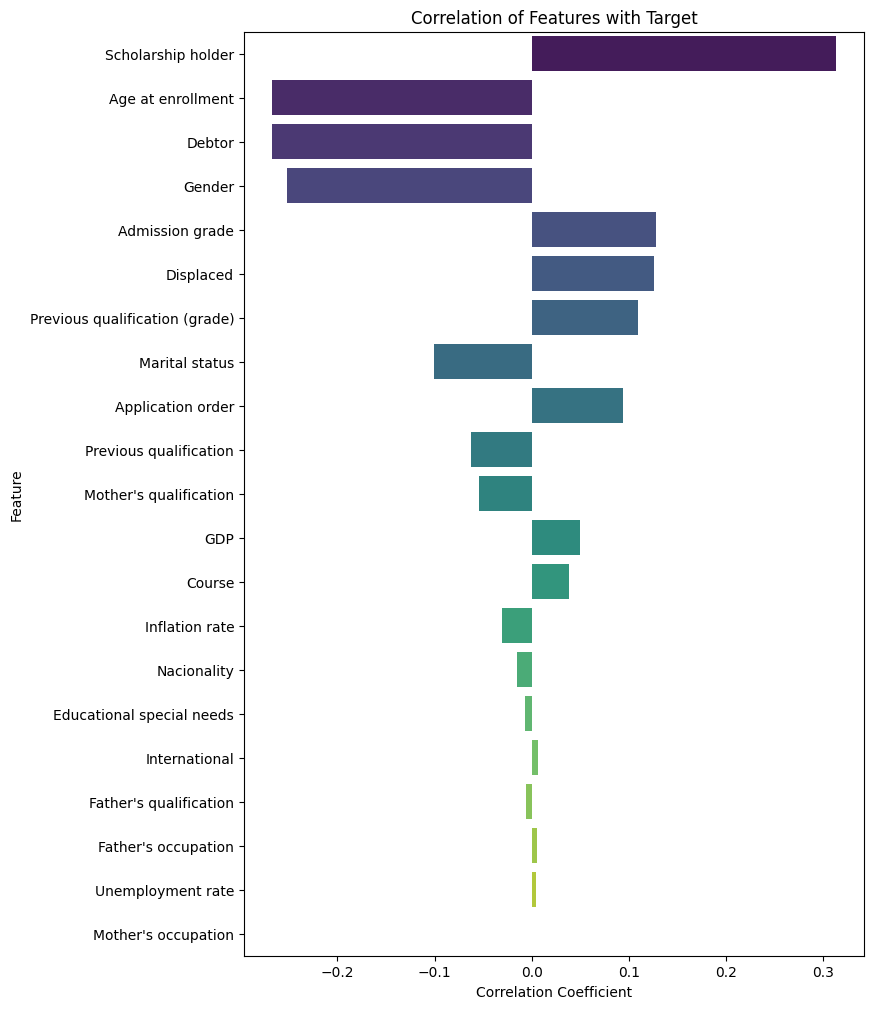

In [307]:
# Calculate correlations with the target variable
correlation = student_success.corr()['Target'].drop('Target').sort_values(key=abs, ascending=False)

# Plotting
plt.figure(figsize=(8, 12))
sns.barplot(x=correlation.values, y=correlation.index, palette="viridis")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.title("Correlation of Features with Target")
plt.show()

In [308]:
student_success.describe()

,Marital status,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.00000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,1.750138,8853.980992,4.532231,132.920606,1.828099,19.986226,22.571625,10.138567,10.28292,...,0.011019,0.113774,0.344077,0.266942,23.461157,0.023691,11.630358,1.231598,-0.009256,0.608540
std,0.613009,1.333831,2068.760082,10.024134,13.238373,6.667614,15.585278,15.275453,23.315697,22.40269,...,0.104407,0.317580,0.475132,0.442423,7.827994,0.152107,2.667652,1.384911,2.259986,0.488144
min,1.000000,0.000000,33.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,9085.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.00000,...,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,1.000000,9254.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.00000,...,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,2.000000,9556.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.00000,...,0.000000,0.000000,1.000000,1.000000,25.000000,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,6.000000,9991.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.00000,...,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,16.200000,3.700000,3.510000,1.000000


In [309]:
student_success.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital status                  3630 non-null   int64  
 1   Application order               3630 non-null   int64  
 2   Course                          3630 non-null   int64  
 3   Previous qualification          3630 non-null   int64  
 4   Previous qualification (grade)  3630 non-null   float64
 5   Nacionality                     3630 non-null   int64  
 6   Mother's qualification          3630 non-null   int64  
 7   Father's qualification          3630 non-null   int64  
 8   Mother's occupation             3630 non-null   int64  
 9   Father's occupation             3630 non-null   int64  
 10  Admission grade                 3630 non-null   float64
 11  Displaced                       3630 non-null   int64  
 12  Educational special needs       3630 no

## Data Preparation

In [310]:
#Rescaling Unemployment Rate
student_success["Unemployment rate"] = student_success["Unemployment rate"] / 100
#Rescaling Inflation rate
student_success["Inflation rate"] = student_success["Inflation rate"] / 100
#Rescaling GDP
student_success["GDP"] = student_success["GDP"] / 100
student_success.head()

,Marital status,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,5,171,1,122.0,1,19,12,5,9,...,0,0,1,0,20,0,0.108,0.014,0.0174,0
1,1,1,9254,1,160.0,1,1,3,3,3,...,0,0,1,0,19,0,0.139,-0.003,0.0079,1
2,1,5,9070,1,122.0,1,37,37,9,9,...,0,0,1,0,19,0,0.108,0.014,0.0174,0
3,1,2,9773,1,122.0,1,38,37,5,3,...,0,0,0,0,20,0,0.094,-0.008,-0.0312,1
4,2,1,8014,1,100.0,1,37,38,9,9,...,0,0,0,0,45,0,0.139,-0.003,0.0079,1


In [311]:
#Normalizing Admission grade
student_success["Admission grade"] = student_success["Admission grade"] / 200
student_success.head()

,Marital status,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,5,171,1,122.0,1,19,12,5,9,...,0,0,1,0,20,0,0.108,0.014,0.0174,0
1,1,1,9254,1,160.0,1,1,3,3,3,...,0,0,1,0,19,0,0.139,-0.003,0.0079,1
2,1,5,9070,1,122.0,1,37,37,9,9,...,0,0,1,0,19,0,0.108,0.014,0.0174,0
3,1,2,9773,1,122.0,1,38,37,5,3,...,0,0,0,0,20,0,0.094,-0.008,-0.0312,1
4,2,1,8014,1,100.0,1,37,38,9,9,...,0,0,0,0,45,0,0.139,-0.003,0.0079,1


In [312]:
#Rescaling Previous qualification grade and Previous qualification

# Needs to be checked!!!!!!!!!!!!!!!!!!!

# The Qualification level feature can have the following integer values. We can map them to respective EQF level.
#Refer this https://oxbridgehomelearning.uk/blog/eqf-european-qualifications/

# 5 - Higher education - doctorate
# 4 - Higher education - master's
# 2 - Higher education - bachelor's degree
# 3 - Higher education - degree
# 1 - Secondary education
# 6 - Frequency of higher education
# 9 - 12th year of schooling - not completed
# 10 - 11th year of schooling - not completed 1
# 2 - Other - 11th year of schooling
# 14 - 10th year of schooling
# 15 - 10th year of schooling - not completed
# 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.
# 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.
# 39 - Technological specialization course
# 40 - Higher education - degree (1st cycle)
# 42 - Professional higher technical course
# 43 - Higher education - master (2nd cycle)

def education_level(qualification_type):
  if qualification_type in [5,44]:
    return 0.8
  elif qualification_type in [4,43]:
    return 0.7
  elif qualification_type in [3,2,40]:
    return 0.6
  elif qualification_type in [42,39,41,6]:
    return 0.5
  elif qualification_type in [1,13,20,22,25]:
    return 0.4
  elif qualification_type in [9,10,12,14,15,19,27,29,31,33]:
    return 0.3
  elif qualification_type in [11,26,38]:
    return 0.2
  elif qualification_type in [18,37]:
    return 0.1
  elif qualification_type in [34,35,36]:
    return 0
  else:
    return -1

In [313]:
# Trying to engineer a feature that clubs Previous Qualification and Grade
student_success["Previous qualification (grade)"] = student_success["Previous qualification (grade)"] / 200
student_success["Previous qualification"] = student_success["Previous qualification"].apply(lambda x: education_level(int(x)))
student_success["Qualification"] = student_success["Previous qualification"] * student_success["Previous qualification (grade)"]
student_success[student_success["Qualification"] < 0]
student_success.drop(columns = ["Previous qualification (grade)","Previous qualification"],inplace=True)

In [314]:
student_success.head()

,Marital status,Application order,Course,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,...,Debtor,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Qualification
0,1,5,171,1,19,12,5,9,0.6365,1,...,0,1,0,20,0,0.108,0.014,0.0174,0,0.244
1,1,1,9254,1,1,3,3,3,0.7125,1,...,0,1,0,19,0,0.139,-0.003,0.0079,1,0.320
2,1,5,9070,1,37,37,9,9,0.6240,1,...,0,1,0,19,0,0.108,0.014,0.0174,0,0.244
3,1,2,9773,1,38,37,5,3,0.5980,1,...,0,0,0,20,0,0.094,-0.008,-0.0312,1,0.244
4,2,1,8014,1,37,38,9,9,0.7075,0,...,0,0,0,45,0,0.139,-0.003,0.0079,1,0.200


In [315]:
#Normalizing parents qualification by taking mean of their level score
student_success["Father's qualification"] = student_success["Father's qualification"].apply(lambda x: education_level(int(x)))
student_success["Mother's qualification"] = student_success["Mother's qualification"].apply(lambda x: education_level(int(x)))
student_success["Parent's qualification"] = (student_success["Father's qualification"] + student_success["Mother's qualification"]) / 2
student_success.drop(columns=["Mother's qualification","Father's qualification"],inplace=True)
student_success.head()

,Marital status,Application order,Course,Nacionality,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Qualification,Parent's qualification
0,1,5,171,1,5,9,0.6365,1,0,0,1,0,20,0,0.108,0.014,0.0174,0,0.244,0.30
1,1,1,9254,1,3,3,0.7125,1,0,0,1,0,19,0,0.139,-0.003,0.0079,1,0.320,0.50
2,1,5,9070,1,9,9,0.6240,1,0,0,1,0,19,0,0.108,0.014,0.0174,0,0.244,0.10
3,1,2,9773,1,5,3,0.5980,1,0,0,0,0,20,0,0.094,-0.008,-0.0312,1,0.244,0.15
4,2,1,8014,1,9,9,0.7075,0,0,0,0,0,45,0,0.139,-0.003,0.0079,1,0.200,0.15


In [316]:
#Scoring Parents occupation

def profession_level(level):
  if level in [1]:
    return 1.0
  elif level in [122,121,112,2]:
    return 0.9
  elif level in [135,124,11,101,123,114]:
    return 0.8
  elif level in [131,132,102,10,125]:
    return 0.7
  elif level in [183,181,174,143,134,103,3,7,8]:
    return 0.6
  elif level in [182,175,172,171,161,154,151,144,141,6,4,99]:
    return 0.5
  elif level in [163,153,151,5]:
    return 0.4
  elif level in [195,194,152]:
    return 0.3
  elif level in [193,192,9,2,191]:
    return 0.2
  elif level in [90]:
    return 0.1
  elif level in [0]:
    return 0
  else:
    return -1

In [317]:
student_success["Father's occupation"] = student_success["Father's occupation"].apply(lambda x: profession_level(int(x)))
student_success["Mother's occupation"] = student_success["Mother's occupation"].apply(lambda x: profession_level(int(x)))
student_success["Parent's occupation"] = (student_success["Father's occupation"] + student_success["Mother's occupation"]) / 2
student_success["Parent_influence_score"] = student_success["Parent's occupation"] * student_success["Parent's qualification"]
student_success.drop(columns=["Mother's occupation","Father's occupation","Parent's qualification","Parent's occupation"])

,Marital status,Application order,Course,Nacionality,Admission grade,Displaced,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Qualification,Parent_influence_score
0,1,5,171,1,0.6365,1,0,0,1,0,20,0,0.108,0.014,0.0174,0,0.244,0.090
1,1,1,9254,1,0.7125,1,0,0,1,0,19,0,0.139,-0.003,0.0079,1,0.320,0.300
2,1,5,9070,1,0.6240,1,0,0,1,0,19,0,0.108,0.014,0.0174,0,0.244,0.020
3,1,2,9773,1,0.5980,1,0,0,0,0,20,0,0.094,-0.008,-0.0312,1,0.244,0.075
4,2,1,8014,1,0.7075,0,0,0,0,0,45,0,0.139,-0.003,0.0079,1,0.200,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,9773,1,0.6110,0,0,0,1,0,19,0,0.155,0.028,-0.0406,1,0.250,0.180
4420,1,2,9773,105,0.5950,1,0,1,0,0,18,1,0.111,0.006,0.0202,0,0.240,0.080
4421,1,1,9500,1,0.7475,1,0,0,0,1,30,0,0.139,-0.003,0.0079,0,0.308,0.020
4422,1,1,9147,1,0.7690,1,0,0,0,1,20,0,0.094,-0.008,-0.0312,1,0.360,0.055


In [318]:
student_success.head()

,Marital status,Application order,Course,Nacionality,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,...,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Qualification,Parent's qualification,Parent's occupation,Parent_influence_score
0,1,5,171,1,0.4,0.2,0.6365,1,0,0,...,20,0,0.108,0.014,0.0174,0,0.244,0.30,0.3,0.090
1,1,1,9254,1,0.6,0.6,0.7125,1,0,0,...,19,0,0.139,-0.003,0.0079,1,0.320,0.50,0.6,0.300
2,1,5,9070,1,0.2,0.2,0.6240,1,0,0,...,19,0,0.108,0.014,0.0174,0,0.244,0.10,0.2,0.020
3,1,2,9773,1,0.4,0.6,0.5980,1,0,0,...,20,0,0.094,-0.008,-0.0312,1,0.244,0.15,0.5,0.075
4,2,1,8014,1,0.2,0.2,0.7075,0,0,0,...,45,0,0.139,-0.003,0.0079,1,0.200,0.15,0.2,0.030


In [319]:
marital_status = pd.get_dummies(student_success["Marital status"],dtype=int)
marital_status.columns = ["Single", "Married", "Widower", "Divorced", "Facto Union", "Legally Separated"]
marital_status.head()

,Single,Married,Widower,Divorced,Facto Union,Legally Separated
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0


In [320]:
student_success = pd.concat([student_success,marital_status],axis = 1)
student_success.drop(columns="Marital status")

,Application order,Course,Nacionality,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Gender,...,Qualification,Parent's qualification,Parent's occupation,Parent_influence_score,Single,Married,Widower,Divorced,Facto Union,Legally Separated
0,5,171,1,0.4,0.2,0.6365,1,0,0,1,...,0.244,0.30,0.30,0.090,1,0,0,0,0,0
1,1,9254,1,0.6,0.6,0.7125,1,0,0,1,...,0.320,0.50,0.60,0.300,1,0,0,0,0,0
2,5,9070,1,0.2,0.2,0.6240,1,0,0,1,...,0.244,0.10,0.20,0.020,1,0,0,0,0,0
3,2,9773,1,0.4,0.6,0.5980,1,0,0,0,...,0.244,0.15,0.50,0.075,1,0,0,0,0,0
4,1,8014,1,0.2,0.2,0.7075,0,0,0,0,...,0.200,0.15,0.20,0.030,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,6,9773,1,0.4,0.5,0.6110,0,0,0,1,...,0.250,0.40,0.45,0.180,1,0,0,0,0,0
4420,2,9773,105,0.2,0.2,0.5950,1,0,1,0,...,0.240,0.40,0.20,0.080,1,0,0,0,0,0
4421,1,9500,1,0.2,0.2,0.7475,1,0,0,0,...,0.308,0.10,0.20,0.020,1,0,0,0,0,0
4422,1,9147,1,0.6,0.5,0.7690,1,0,0,0,...,0.360,0.10,0.55,0.055,1,0,0,0,0,0


In [321]:
student_success.head()

,Marital status,Application order,Course,Nacionality,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,...,Qualification,Parent's qualification,Parent's occupation,Parent_influence_score,Single,Married,Widower,Divorced,Facto Union,Legally Separated
0,1,5,171,1,0.4,0.2,0.6365,1,0,0,...,0.244,0.30,0.3,0.090,1,0,0,0,0,0
1,1,1,9254,1,0.6,0.6,0.7125,1,0,0,...,0.320,0.50,0.6,0.300,1,0,0,0,0,0
2,1,5,9070,1,0.2,0.2,0.6240,1,0,0,...,0.244,0.10,0.2,0.020,1,0,0,0,0,0
3,1,2,9773,1,0.4,0.6,0.5980,1,0,0,...,0.244,0.15,0.5,0.075,1,0,0,0,0,0
4,2,1,8014,1,0.2,0.2,0.7075,0,0,0,...,0.200,0.15,0.2,0.030,0,1,0,0,0,0


In [322]:
# plt.figure(figsize=(20, 10))
# #chekcing for outliers
# label_encoder = LabelEncoder()
# student_success['Target'] = label_encoder.fit_transform(student_success['Target'])
# sns.heatmap(student_success.corr())

In [323]:
student_success.drop(columns=["Course","Nacionality"],inplace=True)

In [324]:
student_success.to_csv("intermediate_data.csv")

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [326]:
X = student_success.copy()

In [327]:
y = X["Target"]

In [328]:
X.drop(columns="Target",inplace=True)

In [329]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [330]:
X.head()

,Marital status,Application order,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Gender,Scholarship holder,...,Qualification,Parent's qualification,Parent's occupation,Parent_influence_score,Single,Married,Widower,Divorced,Facto Union,Legally Separated
0,1,5,0.4,0.2,0.6365,1,0,0,1,0,...,0.244,0.30,0.3,0.090,1,0,0,0,0,0
1,1,1,0.6,0.6,0.7125,1,0,0,1,0,...,0.320,0.50,0.6,0.300,1,0,0,0,0,0
2,1,5,0.2,0.2,0.6240,1,0,0,1,0,...,0.244,0.10,0.2,0.020,1,0,0,0,0,0
3,1,2,0.4,0.6,0.5980,1,0,0,0,0,...,0.244,0.15,0.5,0.075,1,0,0,0,0,0
4,2,1,0.2,0.2,0.7075,0,0,0,0,0,...,0.200,0.15,0.2,0.030,0,1,0,0,0,0


In [331]:
# model = LogisticRegression(max_iter = 50000)
model = RandomForestClassifier(max_depth=2500,max_leaf_nodes=100)
# model = GaussianNB()
# model = KNeighborsClassifier(n_neighbors=100,leaf_size=100)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=2500, max_leaf_nodes=100)

In [332]:
prediction = model.predict(X_test)

In [333]:
confusion_mtx = confusion_matrix(y_test,prediction)
print(confusion_mtx)

[[216 155]
 [ 77 460]]


In [334]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65       371
           1       0.75      0.86      0.80       537

    accuracy                           0.74       908
   macro avg       0.74      0.72      0.72       908
weighted avg       0.74      0.74      0.74       908



In [335]:
prediction = model.predict(X)
confusion_mtx = confusion_matrix(y,prediction)
print(confusion_mtx)
print(classification_report(y,prediction))

[[ 955  466]
 [ 187 2022]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.75      1421
           1       0.81      0.92      0.86      2209

    accuracy                           0.82      3630
   macro avg       0.82      0.79      0.80      3630
weighted avg       0.82      0.82      0.82      3630



In [336]:
#               precision    recall  f1-score   support

#      Dropout       0.65      0.59      0.62       343
#     Graduate       0.76      0.81      0.78       565

#     accuracy                           0.72       908
#    macro avg       0.71      0.70      0.70       908
# weighted avg       0.72      0.72      0.72